<a href="https://colab.research.google.com/github/pszwed-ai/lab-eksploracja-danych/blob/main/NLP_reddit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Przetwarzanie danych tekstowych z reddit.com
## Imię i nazwisko


Informacje o serwisie reddit można znaleźć w [Wikipedii](https://en.wikipedia.org/wiki/Reddit).


* Grupa tematyczna treści publikowanych w serwisie nazywana jest *subredditem*
* Wpis może mieć etykietę (tag), tzw. *flair*
* Z reddit można pobierać dane. W jednym żądaniu można pobrać maksymalnie 100 wpisów. W ciągu minuty można wykonać żądanie co najwyżej 60 razy

Podczas laboratorium  wykonamy dwa zadania:
* ZADANIE 1: pobierzemy dane z dwóch angielskojęzykowych subredditów *datascience* i *MachineLearning*, a następnie sprawdzimy, czy na podstawie treści można określić do której grupy należy wpis (tu wyniki będą niezłe)
* ZADANIE 2: pobierzemy dane z subreditu Polska i spróbujemy sprawdzić, czy da się przewidzieć tag *flair* na podstawie treści (tu wyniki będą średnie)


## Ładowanie danych

Korzystamy z gotowego API. Co 100 wpisów robimy 1-sekundową przerwę. Podajemy ile pakietów po 100 postów chcemy pobrać (parametr ```length```).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests
import time
import sys

def pull_posts(subreddit, length):
    """Load length x 100 posts from a subreddit"""
    posts_list = []
    date = None
    while len(posts_list) < length:
        temp_url = 'https://api.pushshift.io/reddit/search/submission'
        temp_params = {'subreddit': subreddit, 'size': 100, 'before': date}
        temp_res = requests.get(temp_url,temp_params)
        data = temp_res.json()
        posts = data['data']
        posts_list.append(posts)
        earliest_utc = sys.maxsize
        for p in posts:
          if p['created_utc']<earliest_utc:
            earliest_utc=p['created_utc']
        date = earliest_utc
        time.sleep(1)
    return posts_list

def flatten_list(post_groups):
  post_list = []
  for g in post_groups:
      for p in g:
          post_list.append(p)
  return post_list

# Próbnie pobieramy 2 pakiety po 100 wpisów

post_groups = pull_posts('datascience',2)
post_list = flatten_list(post_groups)
print(len(post_list))
print(post_list[0]['title']+' '+post_list[0]['selftext'])


200
Hobby and specialty Hello to all specialists! I am programming as a hobby but studying to be a metallurgist Can I combine these activities and how?


Wyświetl załadowane dane. Teksty występują w kolumnach ```title``` i ```selftext```

In [ ]:
from google.colab import data_table
df = pd.DataFrame(post_list)
data_table.DataTable(df, include_index=False, num_rows_per_page=10,max_columns=80)


## Przetwarzanie wstępne tekstu
Tekst powinien zostać poddany czyszczeniu i konwersji:
* usuwanie znaczników HTML i referencji (typu ```&lt;```)
* usuwanie znaków przestankowych
* zastępowanie specyficznych ciągów znaków symbolem ogólnym, np. zastępowanie liczb własnym znacznikiem ```#num#```, czasu ```#time#``` 

In [ ]:
from bs4 import BeautifulSoup
import re

def clean(text): 
    # znaczniki HTML
    # text = BeautifulSoup(text,features="lxml").get_text()
    text = BeautifulSoup(text, features="html.parser").get_text()

    # różne znaki, liczby
    text = re.sub(r"C\+\+", "cpp", text) #języki
    text = re.sub(r"C\#", "csharp", text) #języki
    text = re.sub(r"[#\",!?;-<>/\\*\\&-]", " ", text) #znaki
    text = re.sub(r"\[[^\]]*\]\(http.+\)", "#link# ", text) # linki markdown
    text = re.sub(r"\d+:\d+(:\d+)?", "#time# ", text) #czas
    text = re.sub(r"\d+\.?\d*", "#num# ", text) #liczby
    text = re.sub('\[[^\]]*\]',' ',text) #
    text = re.sub(r"[:\.\+\=()]", " ", text) #reszta znaków
    words = text.lower().split()
    return " ".join(words)

txt = """Architektura oprogramowania. 
         Framework ORM. Język programowania C++ (C#) &amp; &lt; &gt; <html> 
         \\ instrukcja if(x==-1) [removed] 
         Kilka liczb: 120k$ 500000$ 23 11.53 
         Time: 11:55, 12:23:00
         10MB pamieci około 2GB 
         Markdown **bold title**
         p [p] empty [] 
         link:  [https://github.com/louisfb01/start-machine-learning-in-2020](https://github.com/louisfb01/start-machine-learning-in-2020) """ 
clean(txt)

'architektura oprogramowania framework orm język programowania cpp csharp instrukcja if x #num# kilka liczb #num# k$ #num# $ #num# #num# time #time# #time# #num# mb pamieci około #num# gb markdown bold title p empty link #link#'

**TODO**
* w funkcji ```load_to_data_frame```:
  * sklej kolumny 'title' i 'selftext' (dodając spację) i umieść wynik w kolumnie 'text'
  * zastosuj do kazdego elementu kolumny 'text' funkcję clean()
  * zwróć obiekt DataFrame zawierający wyłącznie kolumny 'text', 'subreddit' i 'link_flair_text'. Możesz do tego użyć funkcji DataFrame loc()

In [ ]:
import datetime
def load_to_data_frame(subreddit,save=True):
  """Załaduj listę postów do pandas DataFrame. """
  post_groups = pull_posts(subreddit,10)
  post_list = flatten_list(post_groups)
  df = pd.DataFrame(post_list)
  if save:
    file_name = subreddit+f'_{datetime.datetime.today()}.csv'
    df.to_csv(file_name)

  # zabezpieczenie w przypadku pustych danych !
  df['title']=df['title'].replace(np.nan, '', regex=True)
  df['selftext']=df['selftext'].replace(np.nan, '', regex=True)  
 
  # sklej kolumny  
  ??? = ??? + " " + ???
  
  df['text']=df['text'].apply(????)
  return df.loc[:,[???,???,....]]


## Wizualizacja w postaci interaktywnej tabeli

In [ ]:
df_ds = load_to_data_frame('datascience')
assert df_ds.shape[1]==3
from google.colab import data_table
data_table.DataTable(df_ds, include_index=False, num_rows_per_page=10)


,text,subreddit,link_flair_text
0,just got accepted to an ms data science progra...,datascience,Education
1,advice on joining a bootcamp hi i'm looking to...,datascience,Career
2,i need data to convince my professor cryptocur...,datascience,Education
3,data scientists without masters or phd how muc...,datascience,Career
4,data science cv,datascience,Discussion
...,...,...,...
995,identifying aliases among organization names w...,datascience,Discussion
996,has anyone ever made a html presentation inste...,datascience,Discussion
997,fun project tasting seattle through data hey j...,datascience,Projects
998,how do know if i'm made for data science i'm a...,datascience,Career


# ZADANIE 1: Data Science vs. Machine Learning
Czy *Data Science* i *Machine Learning* czymś różnią się? Czy na podstawie treści postów można je odróżnić? 

Pobierzemy posty z grup datasience i MachineLearning i umieścimy w jednej tabeli DataFrame

In [ ]:
def concat(subredits):
  df_list = []
  for s in subredits:
    df = load_to_data_frame(s)
    print(f'{s}:{len(df)}')
    time.sleep(1)
    df_list.append(df)
  return pd.concat(df_list,ignore_index=True)
  # return df_list

df = concat(['datascience','MachineLearning'])



datascience:1000
MachineLearning:1000


Tabela powinna zawierać 2000 wierszy i 3 kolumny

In [ ]:
data_table.DataTable(df, include_index=False, num_rows_per_page=10,max_columns=80)


,text,subreddit,link_flair_text
0,what is a data product consultant hello i am u...,datascience,Job Search
1,hobby and specialty hello to all specialists i...,datascience,Education
2,new job offer thoughts hey everyone hoping to ...,datascience,Career
3,model evaluation with multiclass roc and matth...,datascience,Projects
4,trying to make a switch to linux for data scie...,datascience,Discussion
...,...,...,...
1995,my body is ready to be worshiped 👸🏼,MachineLearning,NaN
1996,hell of a way to start the day,MachineLearning,NaN
1997,milf tiddies,MachineLearning,NaN
1998,ethical consideration in ai machine learning d...,MachineLearning,Research


In [ ]:
assert df.subreddit[999]=='datascience'
assert df.subreddit[1000]=='MachineLearning'


Czy posty zawierają słowo 'python'?

**TODO**
* znajdź indeksy wierszy zawierających słowo 'python'. Użyj metody [tekst linku](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.find.html)str.find()
* utwórz DataFrame zawierającą tylko te wiersze i wyświetl

Wydaje się, że słowo występuje w obu grupach postów

In [ ]:
indexes = ????
df_python=df[indexes ???? 0]
data_table.DataTable(df_python, include_index=True, num_rows_per_page=10)

,text,subreddit,link_flair_text
0,what is a data product consultant hello i am u...,datascience,Job Search
10,what's a good first step data management softw...,datascience,Discussion
13,collaction of paid python courses for free fro...,datascience,Education
23,difficulty finding job even after masters prog...,datascience,Job Search
25,plotly app to sharepoint hi i'm a self taught ...,datascience,Education
...,...,...,...
1801,onepanel open source extensible deep learning ...,MachineLearning,NaN
1908,a recent history of my pointless stare down wi...,MachineLearning,Discussion
1914,how are teslas so fast 🤯 does the neural netwo...,MachineLearning,Research
1921,time series analysis real world projects in py...,MachineLearning,NaN


## Ekstrakcja etykiet

**TODO**
* Za pomocą LabelEncoder zakoduj jako liczby etykiety z kolumnt ```subreddit```




In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.?????
le.classes_

array(['MachineLearning', 'datascience'], dtype=object)

## Ekstrakcja cech
Wypróbujemy CountVectorizer i TfidfVectorizer
* Oba mogą wyodrębniać n-gramy (ciągi n symboli)
* Symbolami mogą być słowa lub znaki
* Oba pozwalają na ograniczenie liczby terminów

**TODO**
* Co to jest TF-IDF?
* Obejrzyj wyjście i skasuj! 

In [ ]:
#max 2 słowa
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word',ngram_range=(1,2),max_features=1000)
X = vectorizer.fit_transform(df['text'])
vectorizer.vocabulary_
# vectorizer.stop_words_

In [ ]:
# znaki (max 8)
vectorizer = TfidfVectorizer(analyzer='char_wb',ngram_range=(1,8),max_features=1000)
X = vectorizer.fit_transform(df['text'])
vectorizer.vocabulary_



Stopwords to terminy odrzucone (występujące zbyt czesto lub zbyt rzadko)

In [ ]:
# tylko zliczanie słów 
vectorizer = CountVectorizer(analyzer='word',ngram_range=(1,2),max_features=1000)
X = vectorizer.fit_transform(df['text'])
vectorizer.stop_words_

**TODO** 
* za pomocą ```CountVectorizer``` wyznacz 30 najczęściej występujacych słów. 
* Z reguły najczęściej występujące słowa nie przenoszą żadnaego znaczenia [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law)

In [ ]:
vectorizer = CountVectorizer(????)
vectorizer.fit(df.text)
stopwords = vectorizer.vocabulary_
stopwords


{'and': 0,
 'are': 1,
 'as': 2,
 'be': 3,
 'but': 4,
 'can': 5,
 'data': 6,
 'for': 7,
 'from': 8,
 'have': 9,
 'how': 10,
 'if': 11,
 'in': 12,
 'is': 13,
 'it': 14,
 'learning': 15,
 'link': 16,
 'my': 17,
 'num': 18,
 'of': 19,
 'on': 20,
 'or': 21,
 'science': 22,
 'that': 23,
 'the': 24,
 'this': 25,
 'to': 26,
 'what': 27,
 'with': 28,
 'you': 29}

## Klasyfikacja
Utworzony zostanie ciąg przetwarzania (ang. pipeline) składający się z dwóch kroków:
* ekstrakcji cech z tekstów za pomocą TfidfVectorizer
* klasyfikacji z użyciem MultinomialNB

**TODO**
* Wybierz konfigurację TfidfVectorizer, która wydaje się zwracać lepsze wyniki. Na przykład oblicz średnią F1 z 10 iteracji. Napisz, którą wybrałeś
* Uwaga wyniki mogą się zmieniac, ponieważ zależą od pobranych danych. 

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# vectorizer = TfidfVectorizer(analyzer='word',ngram_range=(1,2),stop_words=stopwords,max_features=1000)
vectorizer = TfidfVectorizer(analyzer='word',ngram_range=(1,2),max_features=1000)
cls = MultinomialNB()

pipeline = make_pipeline(vectorizer, cls)
from sklearn.model_selection import train_test_split
import sklearn
f1s=[]
for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size = 0.1, random_state = i)
  pipeline.fit(X_train,y_train)
  y_pred = pipeline.predict(X_test)
  print(f'Accuracy:{sklearn.metrics.accuracy_score(y_test,y_pred)} F1: {sklearn.metrics.f1_score(y_test,y_pred,average="macro")}')
  f1s.append(sklearn.metrics.f1_score(y_test,y_pred,average="macro"))
print(np.array(f1s).mean())



Accuracy:0.825 F1: 0.8248905565978737
Accuracy:0.825 F1: 0.824785362068534
Accuracy:0.785 F1: 0.7843476516462298
Accuracy:0.78 F1: 0.77997799779978
Accuracy:0.83 F1: 0.8299319727891157
Accuracy:0.805 F1: 0.804995124878122
Accuracy:0.81 F1: 0.8099239695878351
Accuracy:0.785 F1: 0.7849946248656215
Accuracy:0.79 F1: 0.7899159663865546
Accuracy:0.82 F1: 0.8200000000000001
0.8053763226619666


## Walidacja krzyżowa

**TODO**
* Oblicz i wypisz średnie wartości metryk

In [ ]:
from sklearn.model_selection import cross_validate
scoring = ['accuracy','precision_macro','recall_macro','f1_macro']
# scoring = scoring=['accuracy','f1_macro']
cv_results = cross_validate(pipeline, df['text'], y, cv=10,scoring=scoring)

???
???
???
???

print(f'acc={acc} prec={prec} recall={recall} f1={f1}')


acc=0.7775000000000001 prec=0.7785122139225443 recall=0.7775000000000001 f1=0.7773179876904642


# ZADANIE 2: Polski subreddit - przewidujemy tagi

## Ładujemy i wyświetlamy dane

In [ ]:
from google.colab import data_table
df = load_to_data_frame('Polska')
data_table.DataTable(df, include_index=False, num_rows_per_page=10)


,text,subreddit,link_flair_text
0,spadek notowań koalicji obywatelskiej najnowsz...,Polska,Polityka
1,galopujący prorok lipiec #num#,Polska,Polityka
2,serwisy streamingowe muzyczne hej wiecie może ...,Polska,NaN
3,pomoc na podrażnienia pytanie raczej do panów ...,Polska,Luźne Sprawy
4,hej prowadzę badania do pracy licencjackiej i ...,Polska,NaN
...,...,...,...
995,niech ktoś zatrzyma tę karuzelę absurdu,Polska,Polityka
996,szok nieślubny syn grzegorza brauna ukrywa się...,Polska,Śmiechotreść
997,znalazłem zdjęcie w książce ciekawe czy ktoś s...,Polska,NaN
998,znalazłem takie zdjęcie w książce ciekawe czy ...,Polska,NaN


## Wyznaczamy słowa funkcyjne dla języka polskiego

**TODO**
* Wyznacz słowa funkcyjne (stopwords, analogicznie, jak dla języka angielskiego)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
vectorizer = ????
vectorizer.fit(df.text)
stopwords = vectorizer.vocabulary_
stopwords

{'ale': 0,
 'bo': 1,
 'co': 2,
 'czy': 3,
 'dla': 4,
 'do': 5,
 'jak': 6,
 'jest': 7,
 'ma': 8,
 'mam': 9,
 'mi': 10,
 'mnie': 11,
 'może': 12,
 'na': 13,
 'nie': 14,
 'num': 15,
 'od': 16,
 'po': 17,
 'przez': 18,
 'sie': 19,
 'się': 20,
 'są': 21,
 'tak': 22,
 'tego': 23,
 'to': 24,
 'tylko': 25,
 'tym': 26,
 'za': 27,
 'ze': 28,
 'że': 29}

Część postów może nie mieć etykiet. Tych nie chcemy przetwarzać...

In [ ]:
df = df[df.link_flair_text.notnull()]
df

,text,subreddit,link_flair_text
0,spadek notowań koalicji obywatelskiej najnowsz...,Polska,Polityka
1,galopujący prorok lipiec #num#,Polska,Polityka
3,pomoc na podrażnienia pytanie raczej do panów ...,Polska,Luźne Sprawy
6,tylko jedna na #num# pielęgniarek ma mniej niż...,Polska,Lokalne
8,implozja platformy obywatelskiej,Polska,Polityka
...,...,...,...
990,bronisław cieślak nie żyje,Polska,Kino
991,australijczykom wracającym z indii grozi kara ...,Polska,Koronawirus
995,niech ktoś zatrzyma tę karuzelę absurdu,Polska,Polityka
996,szok nieślubny syn grzegorza brauna ukrywa się...,Polska,Śmiechotreść


**TODO**
* Zastosuj LabelEncoder do utworzenia wektora etykiet ```y``` na podsatwie tagów

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit_transform(????)
le.classes_


array(['&amp;#346;miechotre&amp;#347;&amp;#263;', 'Afera bezmięsna',
       'Cyberbezpieczeństwo', 'Dyskusja', 'Edukacja', 'English 🇬🇧',
       'Europa', 'Foliarstwo :illuminati:', 'Foto', 'Gotuj z r/Polska',
       'Gry', 'Harce ministra (bez)edukacji', 'Historia',
       'Jak szybko zarobić', 'Jak to Polska "wstała z kolan"', 'KPO',
       'Kato-talib w natarciu', 'Kiedyś to były czasy', 'Kino',
       'Kino+Książki', 'Koronawirus', 'Kraj :pl:', 'Kultura', 'Kupost',
       'Kupost:snoo_facepalm:', 'LiSkontent', 'Literalnie kupost',
       'Lokalne',
       'Ludzkie jedzenie szkodzi zwierzętom domowym / PiSkontent',
       'Luźne Sprawy', 'Luźne Sprawy Matura 2021', 'Matura', 'Media',
       'Mem', 'Meta', 'Muzyka', 'Nauka', 'PiSkontent', 'Podróże',
       'Polityka', 'Polityka/Felieton', 'Protest', 'Przemyślenia',
       'Pytanie', 'R.I.P.', 'Reportaż', 'Rozdajo', 'Rydzykontent',
       'Społeczeństwo',
       'Społeczeństwo / Smutna wizja przyszłych emerytur', 'Szczecin',
       'Ta

## Czy zbiór jest zrównoważony?

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127468 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127463 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127468 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127463 missing from current font.
  font.set_text(s, 0, flags=flags)


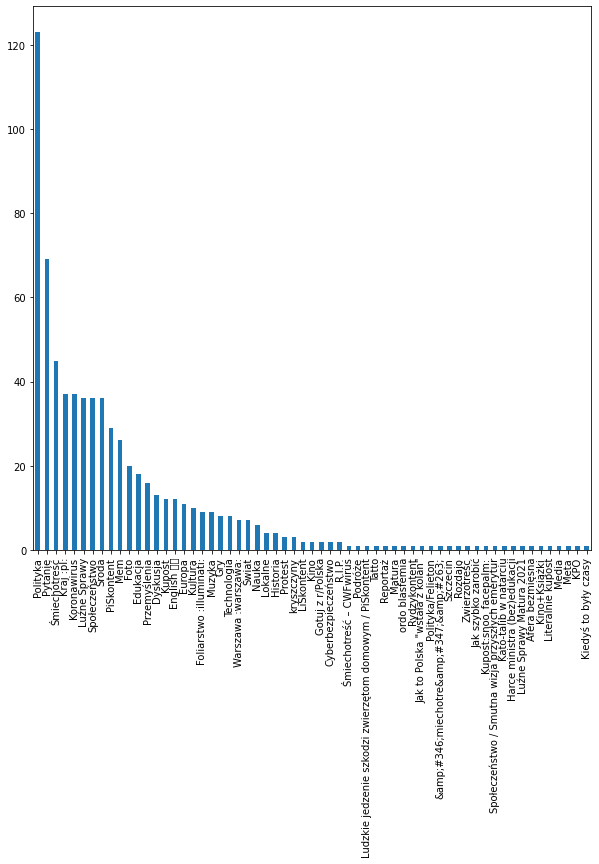

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
df['link_flair_text'].value_counts().plot(kind='bar')

### Usuńmy wpisy o zbyt rzadkich etykietach

In [ ]:
labels,counts = np.unique(df.link_flair_text,return_counts=True)
labels,counts

(array(['&amp;#346;miechotre&amp;#347;&amp;#263;', 'Afera bezmięsna',
        'Cyberbezpieczeństwo', 'Dyskusja', 'Edukacja', 'English 🇬🇧',
        'Europa', 'Foliarstwo :illuminati:', 'Foto', 'Gotuj z r/Polska',
        'Gry', 'Harce ministra (bez)edukacji', 'Historia',
        'Jak szybko zarobić', 'Jak to Polska "wstała z kolan"', 'KPO',
        'Kato-talib w natarciu', 'Kiedyś to były czasy', 'Kino',
        'Kino+Książki', 'Koronawirus', 'Kraj :pl:', 'Kultura', 'Kupost',
        'Kupost:snoo_facepalm:', 'LiSkontent', 'Literalnie kupost',
        'Lokalne',
        'Ludzkie jedzenie szkodzi zwierzętom domowym / PiSkontent',
        'Luźne Sprawy', 'Luźne Sprawy Matura 2021', 'Matura', 'Media',
        'Mem', 'Meta', 'Muzyka', 'Nauka', 'PiSkontent', 'Podróże',
        'Polityka', 'Polityka/Felieton', 'Protest', 'Przemyślenia',
        'Pytanie', 'R.I.P.', 'Reportaż', 'Rozdajo', 'Rydzykontent',
        'Społeczeństwo',
        'Społeczeństwo / Smutna wizja przyszłych emerytur', 'Szcze

In [ ]:
# Ile to jest zbyt rzadko?
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(counts.reshape(-1,1))
print(kmeans.cluster_centers_)
print(kmeans.labels_)

cluster0 = counts[kmeans.labels_==0]
cluster1 = counts[kmeans.labels_==1]

print(cluster0,cluster0.mean(),cluster0.std())
print(cluster1,cluster1.mean(),cluster1.std())

# Wydaje się, że dobrą granicą będzie liczba między 26 a 37

[[ 4.67307692]
 [49.77777778]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0]
[ 1  1  2 13 18 12 11  9 20  2  8  1  4  1  1  1  1  1  2  1 10 12  1  2
  1  4  1  1  1  1 26  1  9  6  1  1  3 16  2  1  1  1  1  1  1  8  7  1
  3  1  1  7] 4.673076923076923 5.750321575777487
[ 37  37  36  29 123  69  36  45  36] 49.77777777777778 28.050659638818473


[Jak usunąć wiersze](https://stackoverflow.com/questions/49735683/python-removing-rows-on-count-condition)

In [ ]:
# Get the count of each value
value_counts = df['link_flair_text'].value_counts()

# Select the values where the count is less than 30 
to_remove = value_counts[value_counts <= 30].index

# Keep rows where the city column is not in to_remove
df = df[~df.link_flair_text.isin(to_remove)]
df

,text,subreddit,link_flair_text
0,spadek notowań koalicji obywatelskiej najnowsz...,Polska,Polityka
1,galopujący prorok lipiec #num#,Polska,Polityka
3,pomoc na podrażnienia pytanie raczej do panów ...,Polska,Luźne Sprawy
8,implozja platformy obywatelskiej,Polska,Polityka
9,prawie #num# #num# godziny w autokarze to będz...,Polska,Kraj :pl:
...,...,...,...
988,leszek miller lewica nie powinna spotykać się ...,Polska,Polityka
991,australijczykom wracającym z indii grozi kara ...,Polska,Koronawirus
995,niech ktoś zatrzyma tę karuzelę absurdu,Polska,Polityka
996,szok nieślubny syn grzegorza brauna ukrywa się...,Polska,Śmiechotreść


In [ ]:
# Można także usunąć duplikaty (prawdopodobnie opisy memów)
df = df.drop_duplicates(subset=['text'])
df.shape


(405, 3)

In [ ]:
le = preprocessing.LabelEncoder()
y=le.fit_transform(df['link_flair_text'])
le.classes_

array(['Koronawirus', 'Kraj :pl:', 'Luźne Sprawy', 'Polityka', 'Pytanie',
       'Społeczeństwo', 'Śmiechotreść', 'Środa'], dtype=object)

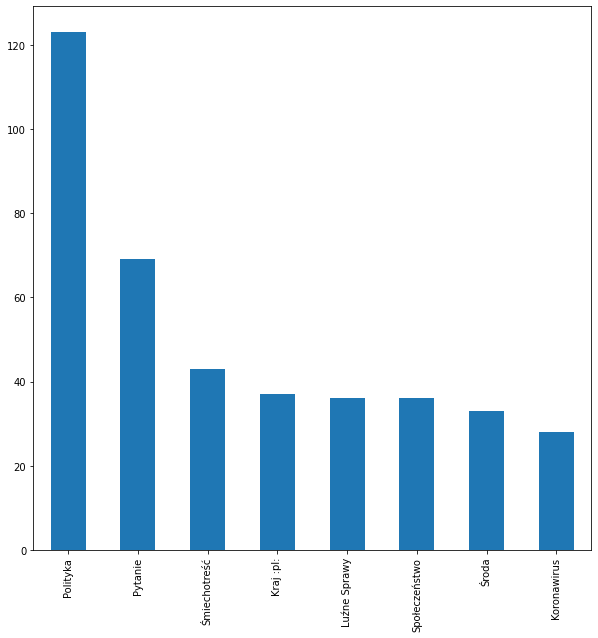

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
df['link_flair_text'].value_counts().plot(kind='bar');

## Klasyfikacja

**TODO**
* Analogicznie, jak wcześniej eksperymentalnie wybierz konfigurację dla klasy TfidfVectorizer (ze stopwords lub bez). Wyniki mogą być rózne w zależności od pobranych postów...

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# vectorizer = TfidfVectorizer(analyzer='word',ngram_range=(1,2),stop_words=stopwords,max_features=1000)
# vectorizer = TfidfVectorizer(analyzer='word',ngram_range=(1,2),max_features=1000)
# vectorizer = TfidfVectorizer(analyzer='char_wb',ngram_range=(1,8),max_features=1000)

cls = MultinomialNB()

pipeline = make_pipeline(vectorizer, cls)
from sklearn.model_selection import train_test_split
import sklearn
for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size = 0.10, random_state = i)
  pipeline.fit(X_train,y_train)
  y_pred = pipeline.predict(X_test)
  print(f'Accuracy:{sklearn.metrics.accuracy_score(y_test,y_pred)} F1: {sklearn.metrics.f1_score(y_test,y_pred,average="macro")}')

Accuracy:0.5609756097560976 F1: 0.23777777777777778
Accuracy:0.4146341463414634 F1: 0.22916666666666669
Accuracy:0.4878048780487805 F1: 0.2756205673758865
Accuracy:0.5365853658536586 F1: 0.30823863636363635
Accuracy:0.43902439024390244 F1: 0.21648550724637677
Accuracy:0.6097560975609756 F1: 0.3634466308884914
Accuracy:0.2682926829268293 F1: 0.19387755102040818
Accuracy:0.43902439024390244 F1: 0.24358974358974356
Accuracy:0.3902439024390244 F1: 0.317241968557758
Accuracy:0.36585365853658536 F1: 0.2007113821138211


## Macierz pomyłek

* Przeprowadź 10-krotną walidację krzyżową.
* Następnie wyświetlona zostanie macierz pomyłek

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_pred = cross_val_predict(pipeline, df['text'], y, cv=10)
conf_mat = confusion_matrix(y, y_pred)


In [ ]:
# Funkcja pobrana z https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
make_confusion_matrix(conf_mat,categories=le.classes_);

**TODO**
* Oceń które tematy są podobne, gdzie najczęściej zachodzą błędne przypisania (wszystko kojarzy się z polityką?)

## Ocena wydajności dla walidacji krzyżowej

**TODO**
* Wykonaj poniższy kod dla róznych krotności podziału w walidacji krzyżowej. Dla 2,3,5,7,10. Wyniki zbierz w tabelce
* Dla jakich wartości osiągane są lepsze wyniki, Dlaczego?

| cv | accuracy |    f1    |
|----|----------|----------|
| 2  |          |          |
| 3  |          |          |
| 5  |          |          |
| 7  |          |          |
| 10 |          |          |

In [ ]:
from sklearn.model_selection import cross_validate
scoring = ['accuracy','precision_macro','recall_macro','f1_macro']
# scoring = scoring=['accuracy','f1_macro']
cv_results = cross_validate(pipeline, df['text'], y, cv=2,scoring=scoring)
print(cv_results)
r = pd.DataFrame(cv_results)
# r.head(10)

{'fit_time': array([0.04801345, 0.03957653]), 'score_time': array([0.01752758, 0.02401137]), 'test_accuracy': array([0.38916256, 0.36138614]), 'test_precision_macro': array([0.38055556, 0.23762969]), 'test_recall_macro': array([0.19771242, 0.17938378]), 'test_f1_macro': array([0.16775329, 0.14280754])}


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
acc= cv_results['test_accuracy'].mean()
prec= cv_results['test_precision_macro'].mean()
recall= cv_results['test_recall_macro'].mean()
f1= cv_results['test_f1_macro'].mean()

print(f'acc={acc} prec={prec} recall={recall} f1={f1}')
# r.describe()

acc=0.375274350095108 prec=0.30909262215128136 recall=0.1885481002510294 f1=0.15528041508155144


## Strojenie parametrów (grid search)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

pipeline


Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=1000,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words={'ale': 0, 'bo': 1, 'co': 2,
                                             'czy': 3, 'dla': 4, 'do': 5,
                                             'j...
                                             'może': 12, 'na': 13, 'nie': 14,
                                             'num': 15, 'od': 16, 'po': 17,
                                             'przez': 18, 'sie': 19, 'się': 20,
                                   

Spróbujemy znaleźć najlepsze parametry klasyfikatora. Jedynym godnym uwagi parametrem jest ```alpha```. Przeszukamy tablicę parametrów z zakresu [0,1]

In [ ]:
alpha = np.linspace(0.001,1,100,endpoint=True)
print(alpha)

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

* Użyjemy gotowej funkcji GridSearchCV
* Parametry dla pipeline przekazujemy jako słownik. Kluczem jest *nazwakomponentu__nazwaparametru*


In [ ]:
params = {'multinomialnb__alpha':alpha}
grid = GridSearchCV(pipeline, params, scoring="f1_macro",cv=10, verbose=1)
grid.fit(df['text'], y)
grid.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setti

{'multinomialnb__alpha': 0.18181818181818182}

**TODO**
* Użyj wyznaczonego najlepszego parametru w konfiguracji klasyfikatora, przeprowadź klasyfikacje  i wyświetl otrzymane metryki (średnie wartości)

In [ ]:
cls = MultinomialNB(alpha=????)

pipeline = make_pipeline(vectorizer, cls)
scoring = ['accuracy','precision_macro','recall_macro','f1_macro']
# scoring = scoring=['accuracy','f1_macro']
cv_results = cross_validate(pipeline, df['text'], y, cv=10,scoring=scoring)
# print(cv_results)


In [ ]:
r = pd.DataFrame(cv_results)
acc= cv_results['test_accuracy'].mean()
prec= cv_results['test_precision_macro'].mean()
recall= cv_results['test_recall_macro'].mean()
f1= cv_results['test_f1_macro'].mean()

print(f'acc={acc} prec={prec} recall={recall} f1={f1}')

acc=0.4742682926829268 prec=0.3799009315119155 recall=0.35034340659340657 f1=0.3308588584119144


Wynik nie jest oszałamiający...